In [8]:
import tfscreen
from tfscreen.plot import heatmap
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Get category of epistasis vs. IPTG

Do an epistasis analysis, then fit a categorical model to it

In [9]:
theta_file = "theta.csv"

# Load dataframe and make genotype into categorical
df = tfscreen.util.read_dataframe(theta_file)
df = tfscreen.genetics.set_categorical_genotype(df)

['wt' 'H29A' 'S69F' 'H29A/S69F']


,best_model,best_model_R2,best_model_AIC_weight,status,w_biphasic_peak,w_flat,w_repressor,w_hill_repressor,w_inducer,w_biphasic_dip,w_bell_peak,w_hill_inducer,w_bell_dip,w_linear
genotype,,,,,,,,,,,,,,
H29A/S69F,biphasic_peak,0.538686,0.368412,success,0.368412,0.334547,0.108186,0.052672,0.046114,0.038553,0.016562,0.016561,0.016561,0.001833


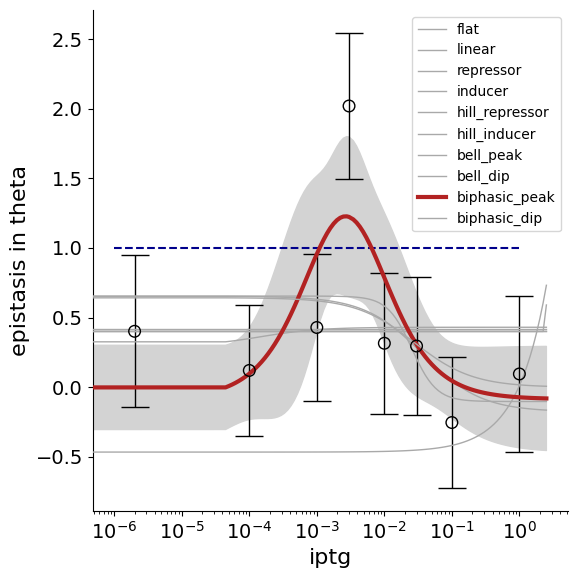

In [10]:
# Use categorizer on epistasis versus titrant conc

mutant_cycle = 100
epistasis_scale = "add"

# Get zero value for plot. For multiplicative, zero epistasis is 
# 1.0. For additive, zero epistasis is zero
if epistasis_scale == "add":
    zero_value = 1
else:
    zero_value = 0


# Get cycles
cycles = tfscreen.genetics.build_cycles(df["genotype"])

# Get the data corresponding to this cycle
cycle_selector = cycles[mutant_cycle]
print(cycle_selector)
cycle_df = df[df["genotype"].isin(cycle_selector)]

# Get epistasis
ep_out = tfscreen.analysis.extract_epistasis(cycle_df,
                                             condition_selector=["titrant_conc"],
                                             y_obs="theta_est",
                                             y_std="theta_std",
                                             scale=epistasis_scale)

# Run the model categorizer
ep_model_dict, ep_fit_summary_df, ep_pred_df = tfscreen.analysis.cat_response(
    ep_out,
    x_column="titrant_conc",
    y_column="ep_obs",
    y_std_column="ep_std",
    verbose=True
)

# Plot the results of the model categorizer
fig, ax = tfscreen.plot.cat_fits(ep_out["titrant_conc"],
                                 ep_out["ep_obs"],
                                 ep_out["ep_std"],
                                 ep_pred_df,
                                 xlog=True,
                                 xlabel="iptg",
                                 ylabel="epistasis in theta")

ax.plot([1e-6,1],[zero_value,zero_value],'--',color="darkblue")
ep_fit_summary_df

In [11]:
cycle_df

,genotype,titrant_name,titrant_conc,theta_est,theta_std,class,name,guess,transform,scale_mu,scale_sigma,idx,lower_bounds,upper_bounds,censored,fixed
0,wt,iptg,0.0000,1.823504,0.166039,theta,theta_wt_iptg_0.0,1.000000,dummy,0.0,1.0,10,-inf,inf,False,False
1,wt,iptg,0.0001,1.752083,0.147329,theta,theta_wt_iptg_0.0001,0.999960,dummy,0.0,1.0,11,-inf,inf,False,False
2,wt,iptg,0.0010,1.649798,0.153619,theta,theta_wt_iptg_0.001,0.996037,dummy,0.0,1.0,12,-inf,inf,False,False
3,wt,iptg,0.0030,1.526672,0.145191,theta,theta_wt_iptg_0.003,0.965431,dummy,0.0,1.0,13,-inf,inf,False,False
4,wt,iptg,0.0100,1.359748,0.149432,theta,theta_wt_iptg_0.01,0.715383,dummy,0.0,1.0,14,-inf,inf,False,False
5,wt,iptg,0.0300,0.994736,0.146830,theta,theta_wt_iptg_0.03,0.218308,dummy,0.0,1.0,15,-inf,inf,False,False
6,wt,iptg,0.1000,0.611660,0.145947,theta,theta_wt_iptg_0.1,0.024519,dummy,0.0,1.0,16,-inf,inf,False,False
7,wt,iptg,1.0000,0.682915,0.142134,theta,theta_wt_iptg_1.0,0.000251,dummy,0.0,1.0,17,-inf,inf,False,False
8,H29A,iptg,0.0000,1.526031,0.199394,theta,theta_H29A_iptg_0.0,1.000000,dummy,0.0,1.0,18,-inf,inf,False,False
9,H29A,iptg,0.0001,1.373863,0.192328,theta,theta_H29A_iptg_0.0001,0.999960,dummy,0.0,1.0,19,-inf,inf,False,False


In [12]:
ep_model_dict, ep_fit_summary_df, ep_pred_df = tfscreen.analysis.cat_response(
    ep_out,
    x_column="titrant_conc",
    y_column="ep_obs",
    y_std_column="ep_std",
    verbose=False,
)

ep_out

,genotype,titrant_conc,00_theta_est,01_theta_est,10_theta_est,11_theta_est,00_theta_std,01_theta_std,10_theta_std,11_theta_std,ep_obs,ep_std
0,H29A/S69F,0.0000,1.823504,1.526031,1.543919,1.648189,0.166039,0.199394,0.148519,0.456661,0.401744,0.545824
1,H29A/S69F,0.0001,1.752083,1.373863,1.373452,1.116009,0.147329,0.192328,0.141395,0.374741,0.120777,0.468101
2,H29A/S69F,0.0010,1.649798,1.336662,1.184952,1.300893,0.153619,0.192390,0.142237,0.441917,0.429077,0.525485
3,H29A/S69F,0.0030,1.526672,1.219757,0.926699,2.639377,0.145191,0.186940,0.136382,0.449278,2.019592,0.525811
4,H29A/S69F,0.0100,1.359748,1.025603,0.667637,0.649400,0.149432,0.194242,0.142237,0.419066,0.315908,0.505873
5,H29A/S69F,0.0300,0.994736,0.739238,0.723110,0.763714,0.146830,0.185897,0.137475,0.411919,0.296103,0.494665
6,H29A/S69F,0.1000,0.611660,0.507188,0.661355,0.303559,0.145947,0.183742,0.134806,0.384858,-0.253324,0.470479
7,H29A/S69F,1.0000,0.682915,0.603748,0.802809,0.819181,0.142134,0.177801,0.130318,0.496624,0.095540,0.561634
